Q: Can MADGICS work on extremely non-Gaussian data, like the two moons dataset?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [80]:
x, y = make_moons(n_samples = 10000, noise = 0.1)

In [82]:
x[y == 1].shape

(5000, 2)

In [83]:
# We are taking each "moon" to be a component
x1 = x[y == 1].T
x2 = x[y == 0].T

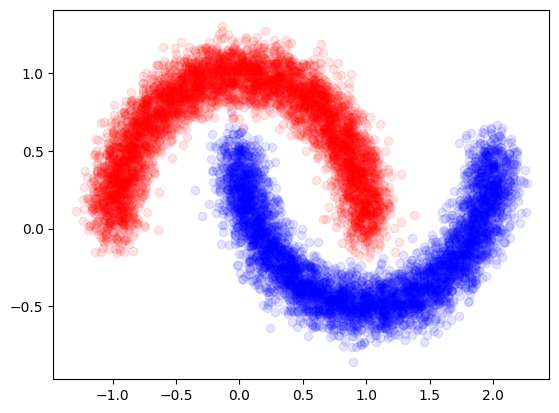

In [84]:
plt.plot(*x1, 'bo', alpha = 0.1)
plt.plot(*x2, 'ro', alpha = 0.1)

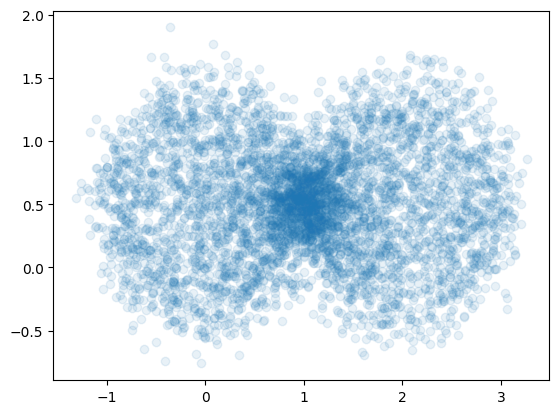

In [122]:
total_data = (x1 + x2)
plt.plot(*total_data, 'o', alpha = 0.1)

In [113]:
cov1 = (np.matmul(x1,x1.T))/x1.shape[1]
cov2 = (np.matmul(x2,x2.T))/x2.shape[1]

In [119]:
cov1, cov2, cov1+cov2

(array([[ 1.50978047, -0.14028283],
        [-0.14028283,  0.12283   ]]),
 array([[ 0.50975506, -0.00075179],
        [-0.00075179,  0.50926123]]),
 array([[ 2.01953552, -0.14103462],
        [-0.14103462,  0.63209123]]))

In [115]:
ctotinv = np.linalg.inv(cov1 + cov2)

In [116]:
recovered_x1 = np.matmul(np.matmul(cov1, ctotinv), total_data)
recovered_x2 = np.matmul(np.matmul(cov2, ctotinv), total_data)

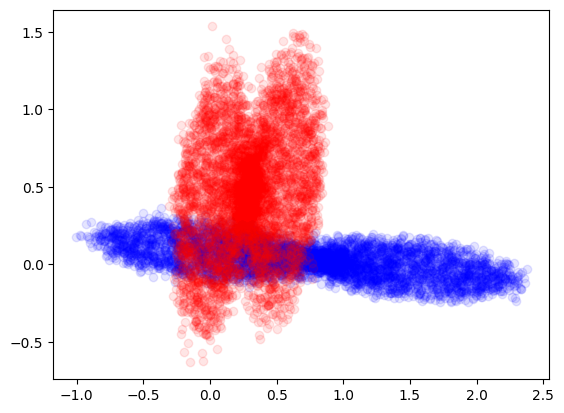

In [117]:
plt.plot(*recovered_x1, 'bo', alpha = 0.1)
plt.plot(*recovered_x2, 'ro', alpha = 0.1)

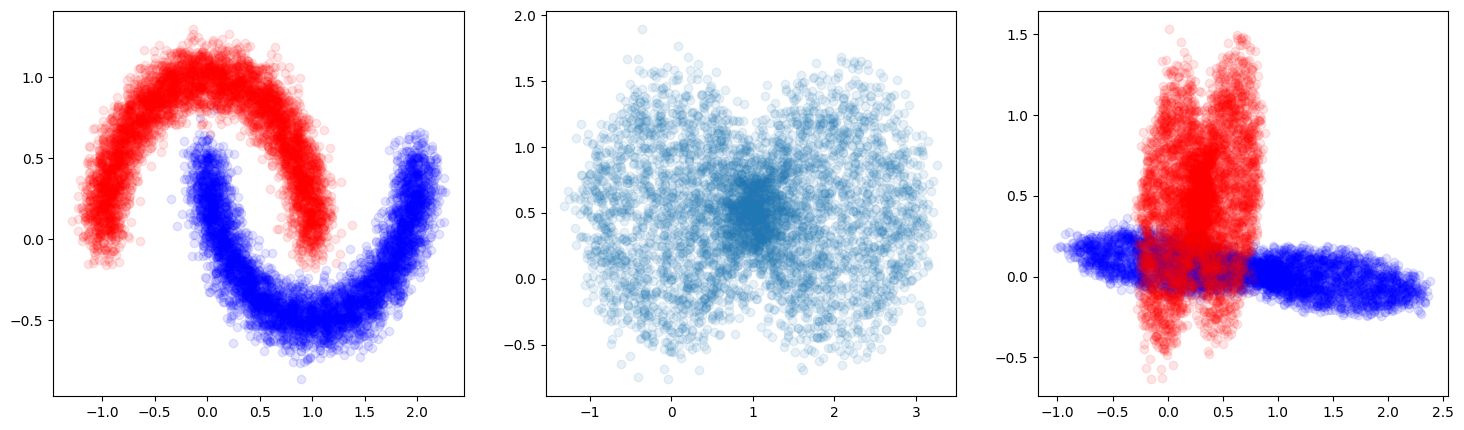

In [141]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(*x1, 'bo', alpha = 0.1)
ax[0].plot(*x2, 'ro', alpha = 0.1)
ax[1].plot(*total_data, 'o', alpha = 0.1)
ax[2].plot(*recovered_x1, 'bo', alpha = 0.1)
ax[2].plot(*recovered_x2, 'ro', alpha = 0.1)
fig.savefig("../G2/APMTH210/final_project_figures/twomoons.pdf", bbox_inches='tight')

A: No, it cannot.